# 一、前期工作

## 1. 设置GPU（如果使用的是CPU可以忽略这步）

我的环境：

- 语言环境：Python3.6.5
- 编译器：jupyter notebook
- 深度学习环境：TensorFlow2.4.1

**来自专栏：**[**《深度学习100例》**](https://blog.csdn.net/qq_38251616/category_11068756.html)

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpus[0] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")

## 2. 导入数据

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 3.归一化

In [3]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## 4.可视化

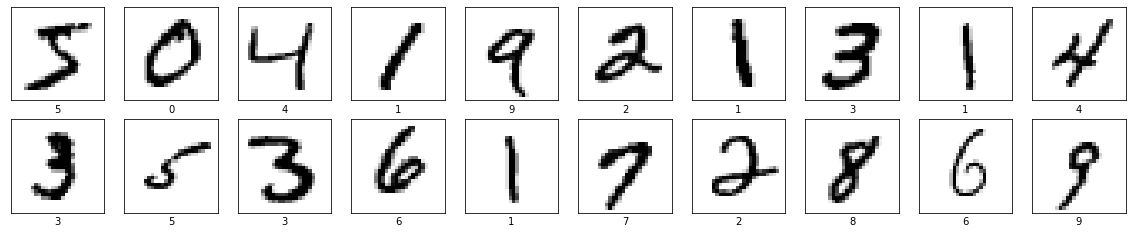

In [4]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## 5.调整图片格式

In [5]:
#调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

# 二、构建CNN网络模型

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# 三、编译模型

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 四、训练模型

In [8]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1476 - accuracy: 0.9539 - val_loss: 0.0508 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0338 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0336 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0252 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0300 - val_accuracy:

# 五、预测

通过下面的网络结构我们可以简单理解为，输入一张图片，将会得到一组数，这组代表这张图片上的数字为0~9中每一个数字的几率，out数字越大可能性越大。

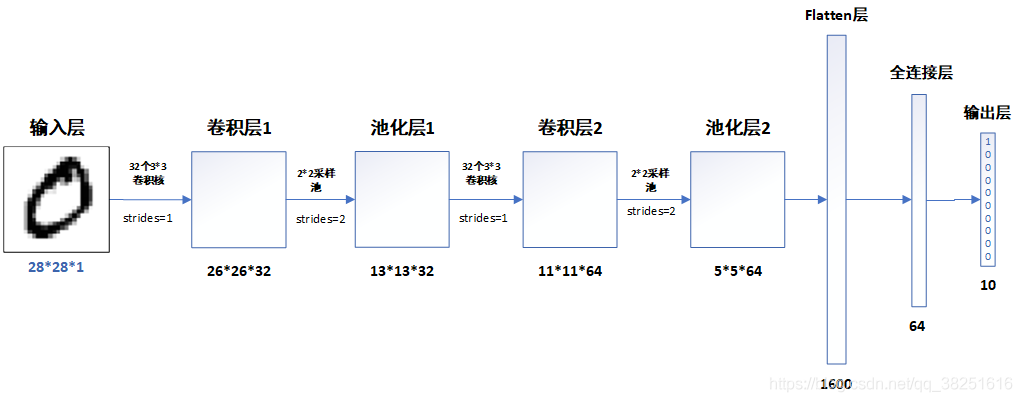

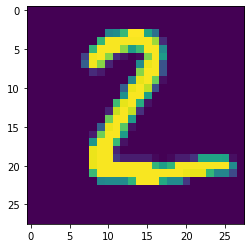

In [9]:
plt.imshow(test_images[1])

输出测试集中第一张图片的预测结果

In [10]:
pre = model.predict(test_images)
pre[1]

array([ -6.5127053,   9.303285 ,  26.847206 , -20.515762 , -15.955353 ,
       -27.25869  ,   1.3523495,  -7.136698 ,  -2.3297002, -28.622198 ],
      dtype=float32)

# 六、知识点详解

本文使用的是最简单的CNN模型- -LeNet-5，如果是第一次接触深度学习的话，可以先试着把代码跑通，然后再尝试去理解其中的代码。

## 1. MNIST手写数字数据集介绍

MNIST手写数字数据集来源于是美国国家标准与技术研究所，是著名的公开数据集之一。数据集中的数字图片是由250个不同职业的人纯手写绘制，数据集获取的网址为：http://yann.lecun.com/exdb/mnist/ （下载后需解压）。我们一般会采用`(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()`这行代码直接调用，这样就比较简单

MNIST手写数字数据集中包含了70000张图片，其中60000张为训练数据，10000为测试数据，70000张图片均是`28*28`，数据集样本如下：

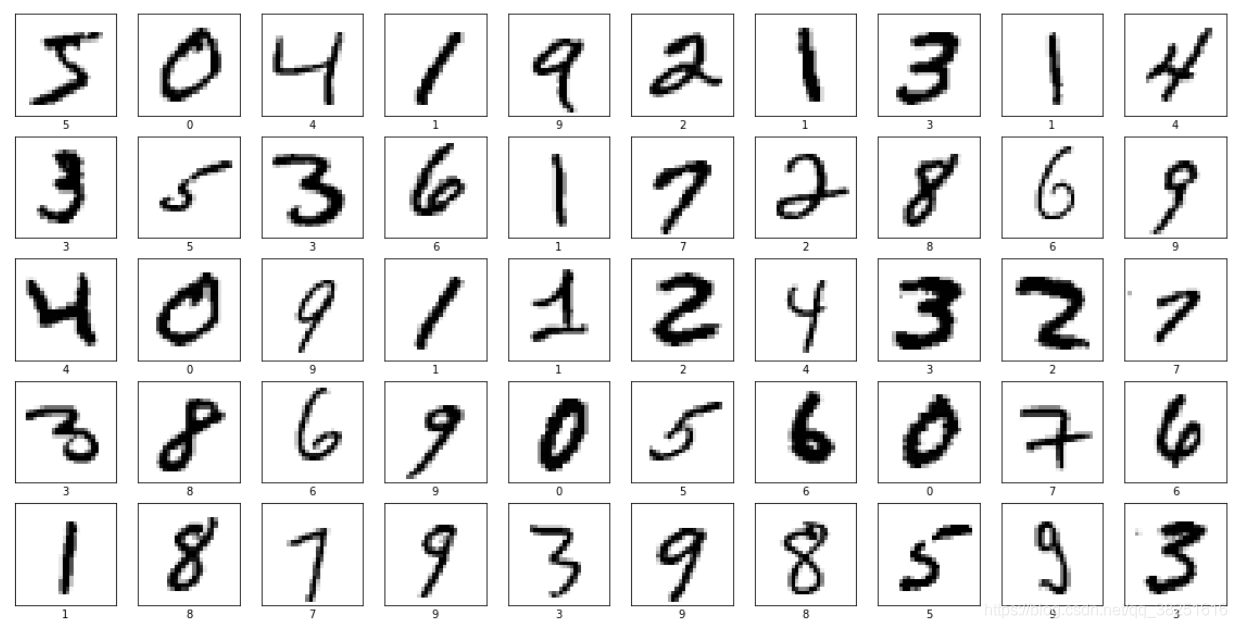

如果我们把每一张图片中的像素转换为向量，则得到长度为`28*28=784`的向量。因此我们可以把训练集看成是一个`[60000,784]`的张量，第一个维度表示图片的索引，第二个维度表示每张图片中的像素点。而图片里的每个像素点的值介于`0-1`之间。

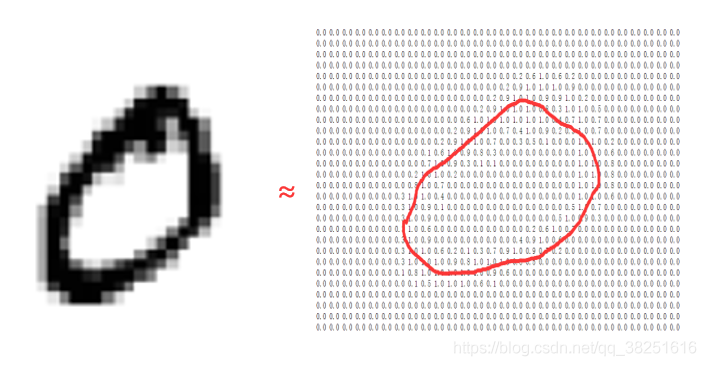

## 2. 神经网络程序说明

神经网络程序可以简单概括如下：

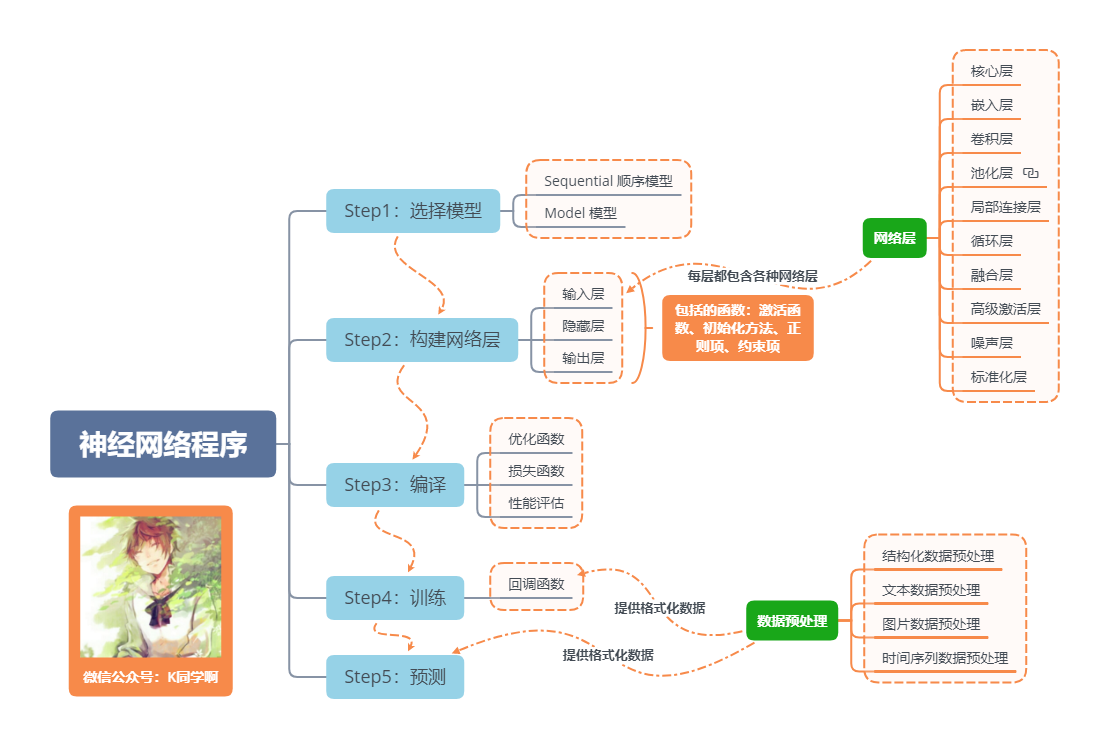

## 3. 网络结构说明 

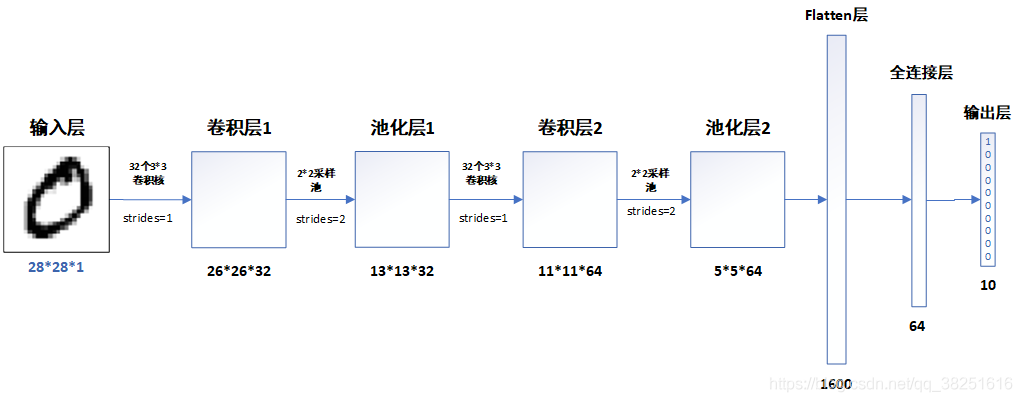

**各层的作用**

- 输入层：用于将数据输入到训练网络
- 卷积层：使用卷积核提取图片特征
- 池化层：进行下采样，用更高层的抽象表示图像特征
- Flatten层：将多维的输入一维化，常用在卷积层到全连接层的过渡
- 全连接层：起到“特征提取器”的作用
- 输出层：输出结果